1. Splitting Data
2. Base models
3. Cross-validation
4. Confusion Matrix
5. Decissions Trees and Random Forests Visualizations
6. Hyper-parameter tuning
7. Voting Classifier
8. Recursive feature elimination (RFE) with cross validation
9. Feature importance
10. Predictions

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

# 1. Splitting Data

In [3]:
df = pd.read_csv('data_df.csv', sep = '\t', index_col = 0)
columns = ['Embarked','Parch','Pclass','Sex','SibSp','Survived','Title','AgeGroups','FareCategory','DeckCode','RoomCategory','FamilySize','Alone']
target = ['Survived']
data = df[columns]

train_shape = pd.read_csv('train.csv').shape[0]
train_df = data[:train_shape]
test_df = data[train_shape:]

X = train_df.drop('Survived', axis = 1)
Y = train_df['Survived']

In [4]:
print(X.shape, Y.shape)

(891, 12) (891,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, train_size = 0.7, random_state = 0, stratify = Y)
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 2. Base Models

In [6]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [7]:
acc = []
classifier = ['Support Vector Machines', 'Linear SVC', 'LogisticRegression', 'KNN', 'Naive Bayes', 'Decision Tree',
             'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier', 'Stochastic Gradient Descent',
             'AdaBoost Classifier', 'Bagging Classifier']
models = [svm.SVC(), LinearSVC(), LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), SGDClassifier(),
         AdaBoostClassifier(), BaggingClassifier()]

for model in models:
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    a = round(accuracy_score(prediction, y_test)*100,2)
    acc.append({'Accuracy': a})
    
df = pd.DataFrame(acc, index = classifier).sort_values(by = 'Accuracy', ascending = False)
print(df)

                             Accuracy
Bagging Classifier              83.58
Support Vector Machines         83.21
Gradient Boosting               83.21
Linear SVC                      82.84
LogisticRegression              82.46
KNN                             82.46
Random Forest                   82.09
AdaBoost Classifier             82.09
Extra Trees Classifier          80.60
Decision Tree                   79.85
Naive Bayes                     76.87
Stochastic Gradient Descent     76.49


In [8]:
# THE SAME
models = [svm.SVC(), LinearSVC(), LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), SGDClassifier(),
         AdaBoostClassifier(), BaggingClassifier()]

df = pd.DataFrame(columns = ['Name','Accuracy'])
row_index = 0
for model in models:
    name = model.__class__.__name__
    df.loc[row_index,'Name'] = name
    
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    a = round(accuracy_score(prediction, y_test)*100,2)
    df.loc[row_index, 'Accuracy'] = a
    row_index +=1
df.sort_values(by = 'Accuracy', ascending = False, inplace = True)
print(df)

                          Name Accuracy
7   GradientBoostingClassifier    83.58
0                          SVC    83.21
6       RandomForestClassifier    83.21
1                    LinearSVC    82.84
2           LogisticRegression    82.46
3         KNeighborsClassifier    82.46
10          AdaBoostClassifier    82.46
8         ExtraTreesClassifier    82.09
11           BaggingClassifier    81.72
5       DecisionTreeClassifier     80.6
4                   GaussianNB    76.87
9                SGDClassifier    44.03


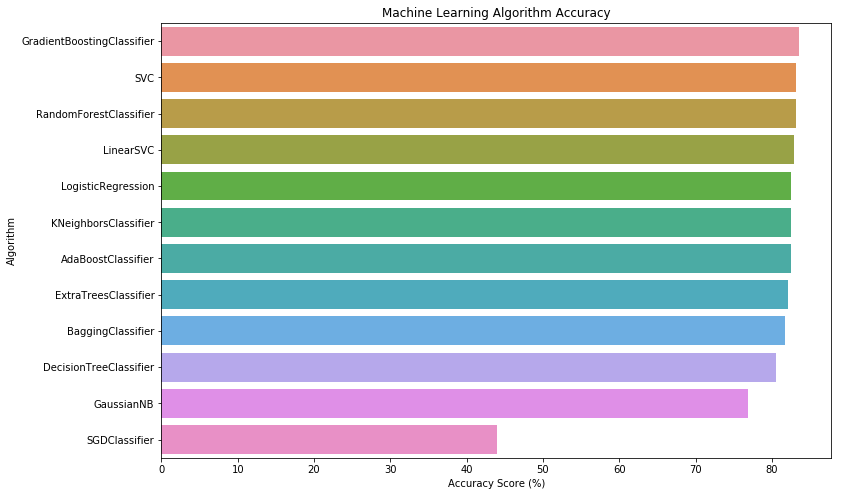

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x= 'Accuracy', y= 'Name', data = df)
ax.set (title = 'Machine Learning Algorithm Accuracy', ylabel = 'Algorithm', xlabel = 'Accuracy Score (%)')

# 3. Cross-validation

In [7]:
from sklearn.model_selection import ShuffleSplit
cv_split = ShuffleSplit(n_splits = 10, test_size = 0.3, train_size = 0.7, random_state = 0)

In [11]:
models = [svm.SVC(), LinearSVC(), LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), SGDClassifier(),
         AdaBoostClassifier(), BaggingClassifier()]

df = pd.DataFrame(columns = ['Name','Train Mean Accuracy', 'Test Mean Accuracy', 'Time'])
row_index = 0
for model in models:
    name = model.__class__.__name__
    df.loc[row_index,'Name'] = name
    
    cv_result = cross_validate(model, X,Y, cv = cv_split)
    df.loc[row_index, 'Train Mean Accuracy'] = round(cv_result['train_score'].mean()*100,2)
    df.loc[row_index, 'Test Mean Accuracy'] = round(cv_result['test_score'].mean()*100,2)
    df.loc[row_index, 'Time'] = cv_result['fit_time'].mean()
    
    row_index +=1
df.sort_values(by = 'Test Mean Accuracy', ascending = False, inplace = True)
df

Name Train Mean Accuracy Test Mean Accuracy  \
11           BaggingClassifier               92.01              82.84   
7   GradientBoostingClassifier               88.65              82.69   
8         ExtraTreesClassifier               92.63               82.5   
0                          SVC               84.75              82.28   
3         KNeighborsClassifier               85.86              81.98   
6       RandomForestClassifier               92.05              81.94   
10          AdaBoostClassifier               83.32              81.49   
5       DecisionTreeClassifier               92.63              81.34   
2           LogisticRegression                82.1              81.16   
1                    LinearSVC               82.15              80.63   
4                   GaussianNB               79.12              78.77   
9                SGDClassifier               73.95              73.81   

          Time  
11    0.071104  
7     0.249614  
8    0.0596035  
0    0.0365021  
3   0.00770042  
6    0.0626036  
10    0.272516  
5    0.0086005  
2    0.0107005  
1     0.121407  
4   0.00780044  
9   0.00820045

In [12]:
# SPLIT BaggingClassifier on DecisionTree and KNN
# + add XGBOOST and LGBOOST
columns_no = ['Embarked','Parch','Pclass','Sex','SibSp','Title','AgeGroups','FareCategory','DeckCode','RoomCategory','FamilySize','Alone']
target = ['Survived']

acc = []
out = []
classifier = ['Support Vector Machines', 'Linear SVC', 'LogisticRegression', 'KNN', 'Naive Bayes', 'Decision Tree',
             'Random Forest', 'Gradient Boosting', 'Extra Trees Classifier', 'Stochastic Gradient Descent',
             'AdaBoost Classifier', 'Bagging Classifier (Decision Tree)', 'Bagging Classifier (KNN)', 'XGBClassifier', 'LGBMClassifier']
models = [svm.SVC(), LinearSVC(), LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), SGDClassifier(),
         AdaBoostClassifier(), BaggingClassifier(base_estimator = DecisionTreeClassifier()), 
         BaggingClassifier(KNeighborsClassifier()), XGBClassifier(), LGBMClassifier()]

model_predict = train_df[target]

for model in models:
    cv_result = cross_validate(model, train_df[columns_no],train_df[target], cv = cv_split)
    acc.append({'Train Mean Accuracy': round(cv_result['train_score'].mean()*100,2),
               'Test Mean Accuracy': round(cv_result['test_score'].mean()*100,2),
               'Time': cv_result['fit_time'].mean()})
    out.append(cv_result['test_score'])
    
    name = model.__class__.__name__
    model.fit(train_df[columns_no],train_df[target])
    model_predict[name] = model.predict(train_df[columns_no])
    
df = pd.DataFrame(acc, index = classifier, columns = ['Train Mean Accuracy', 'Test Mean Accuracy', 'Time']).sort_values(by = 'Test Mean Accuracy', ascending = False)
df

Train Mean Accuracy  Test Mean Accuracy  \
LGBMClassifier                                    89.90               83.21   
XGBClassifier                                     87.27               83.13   
Gradient Boosting                                 88.64               82.72   
Random Forest                                     91.88               82.57   
Bagging Classifier (Decision Tree)                91.85               82.57   
Extra Trees Classifier                            92.63               82.35   
Support Vector Machines                           84.75               82.28   
KNN                                               85.86               81.98   
Bagging Classifier (KNN)                          86.00               81.53   
AdaBoost Classifier                               83.32               81.49   
Decision Tree                                     92.63               81.42   
LogisticRegression                                82.10               81.16   
Linear SVC                                        82.13               80.63   
Naive Bayes                                       79.12               78.77   
Stochastic Gradient Descent                       70.02               70.11   

                                        Time  
LGBMClassifier                      0.181610  
XGBClassifier                       0.100306  
Gradient Boosting                   0.302517  
Random Forest                       0.069904  
Bagging Classifier (Decision Tree)  0.064904  
Extra Trees Classifier              0.060503  
Support Vector Machines             0.038102  
KNN                                 0.010401  
Bagging Classifier (KNN)            0.054103  
AdaBoost Classifier                 0.267715  
Decision Tree                       0.010101  
LogisticRegression                  0.014001  
Linear SVC                          0.130907  
Naive Bayes                         0.009200  
Stochastic Gradient Descent         0.008700

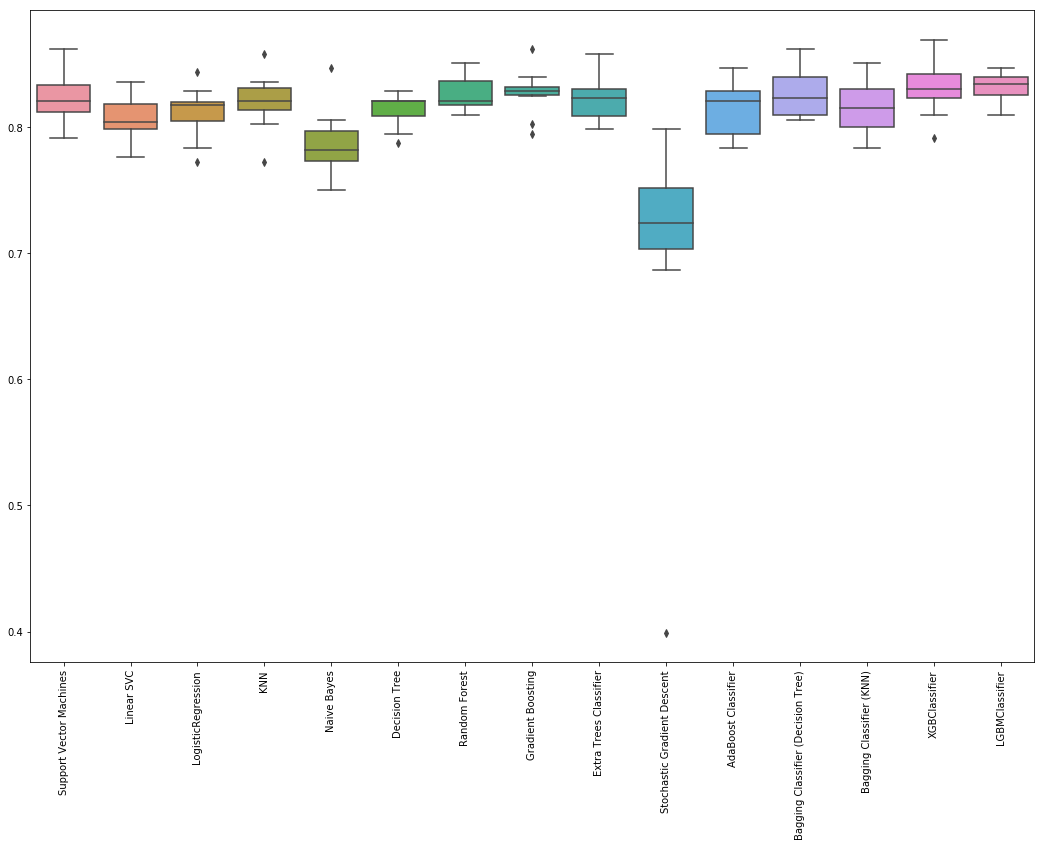

In [13]:
plt.subplots(figsize = (18,12))
df_acc = pd.DataFrame(out, index = [classifier])
ax = sns.boxplot(data = df_acc.T)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

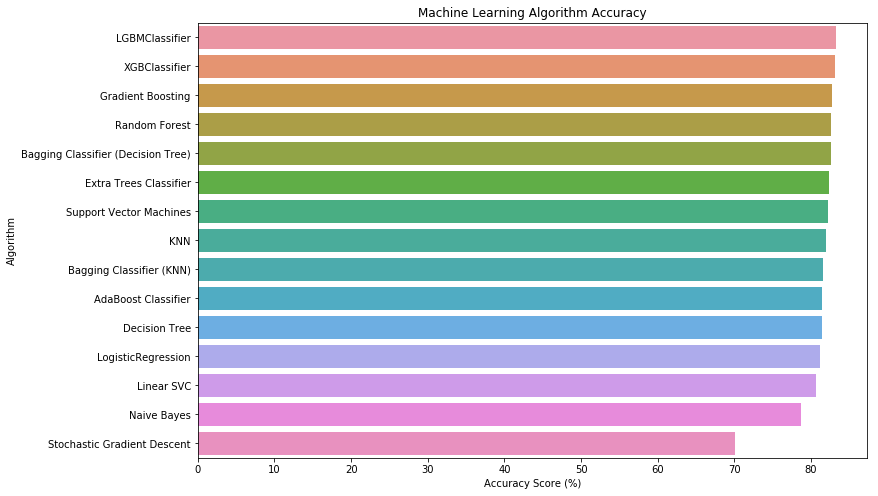

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x= 'Test Mean Accuracy', y= df.index, data = df)
ax.set (title = 'Machine Learning Algorithm Accuracy', ylabel = 'Algorithm', xlabel = 'Accuracy Score (%)')

# 4. CONFUSION MATRIX

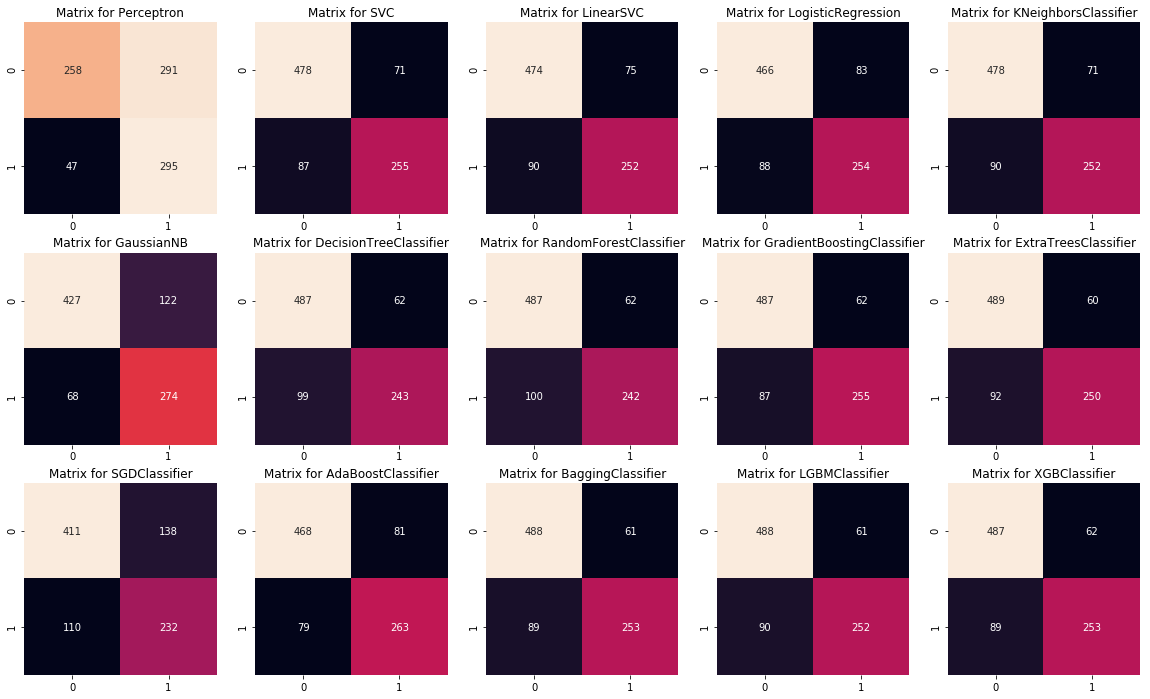

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix

models = [Perceptron(), svm.SVC(), LinearSVC(), LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), SGDClassifier(),
         AdaBoostClassifier(), BaggingClassifier(), LGBMClassifier(), XGBClassifier()]

f, ax = plt.subplots(3,5, figsize = (20,12))
index = 0
for i in range(0,3):
    for j in range(0,5):
        y_pred = cross_val_predict(models[index],X,Y, cv = 10)
        sns.heatmap(confusion_matrix(Y,y_pred), annot = True, fmt = '2.0f', cbar = False, ax = ax[i,j])
        ax[i,j].set_title('Matrix for '+ models[index].__class__.__name__)
        j+=1
        index+=1
    i+=1
    

# 5. Decissions Trees and Random Forests Visualizations

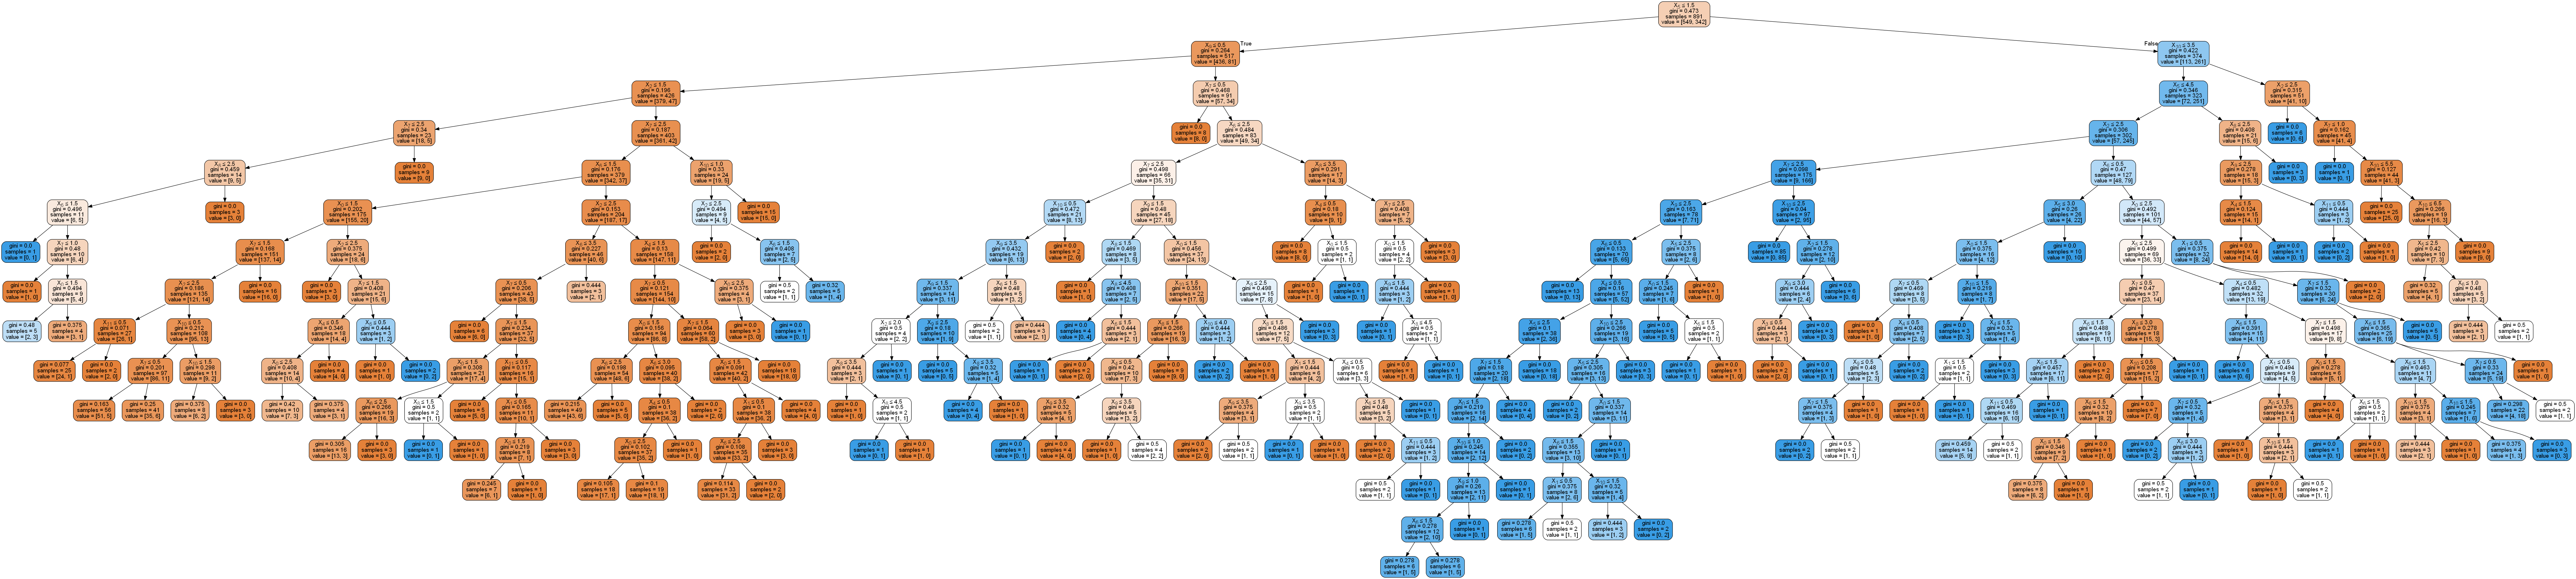

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

alg = DecisionTreeClassifier().fit(X,Y)

dot_data = StringIO()
export_graphviz(alg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png('decissiontree.png')

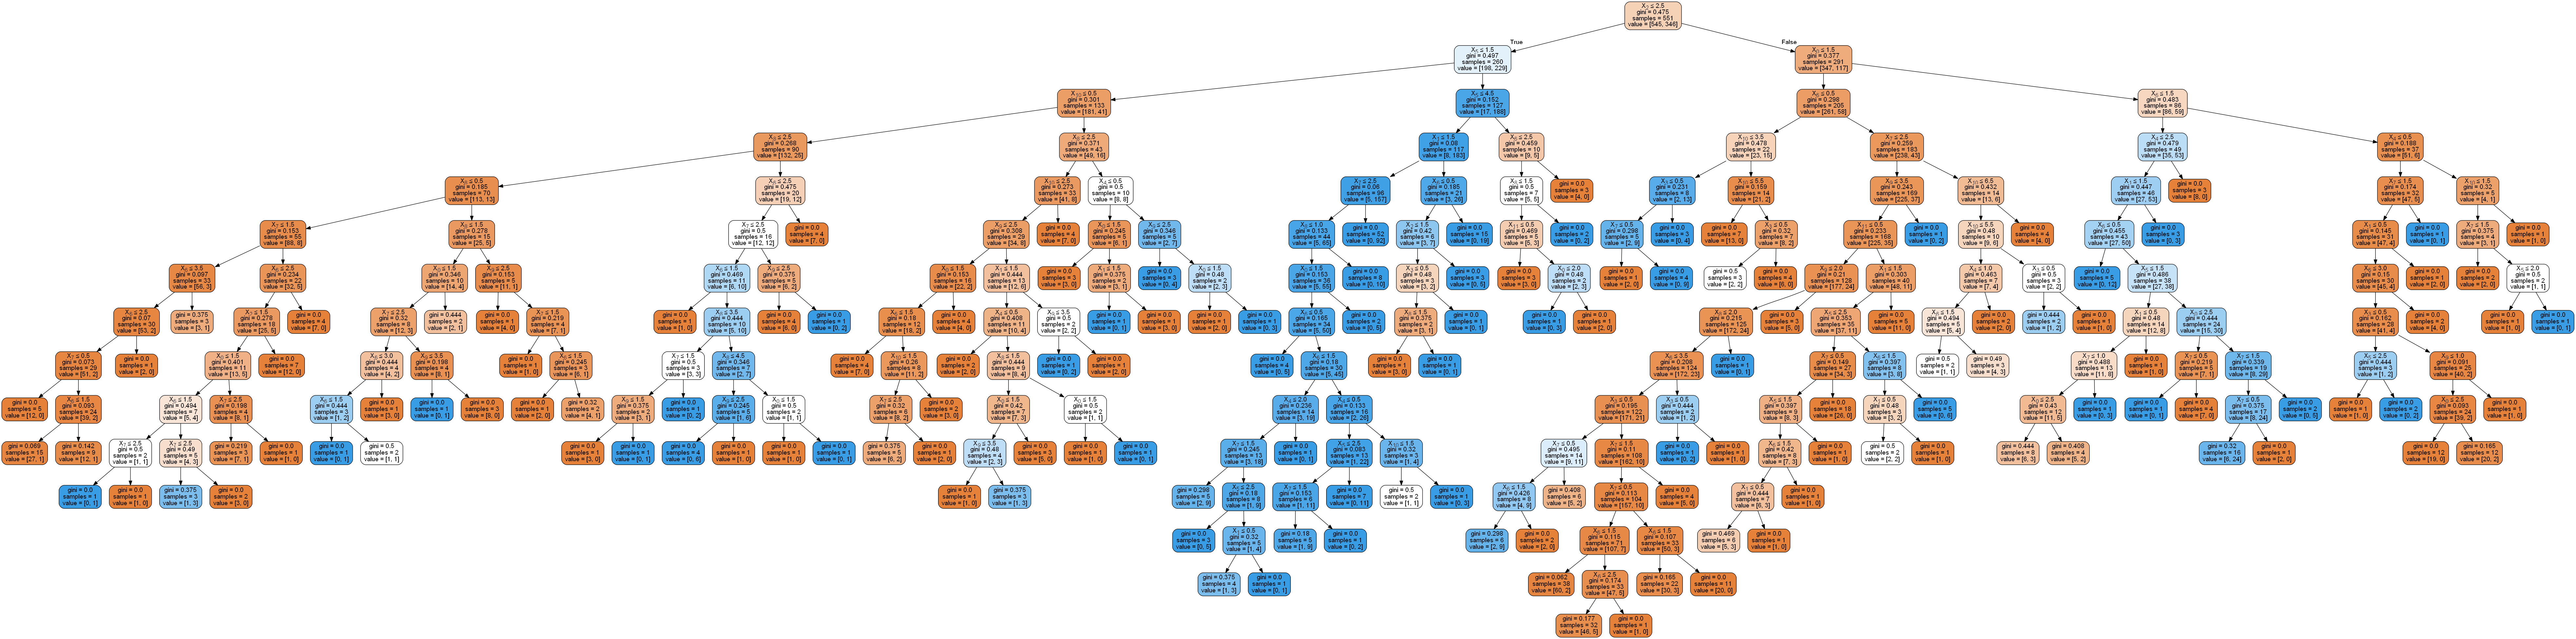

In [34]:
alg = RandomForestClassifier().fit(X,Y)

dot_data = StringIO()
export_graphviz(alg[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

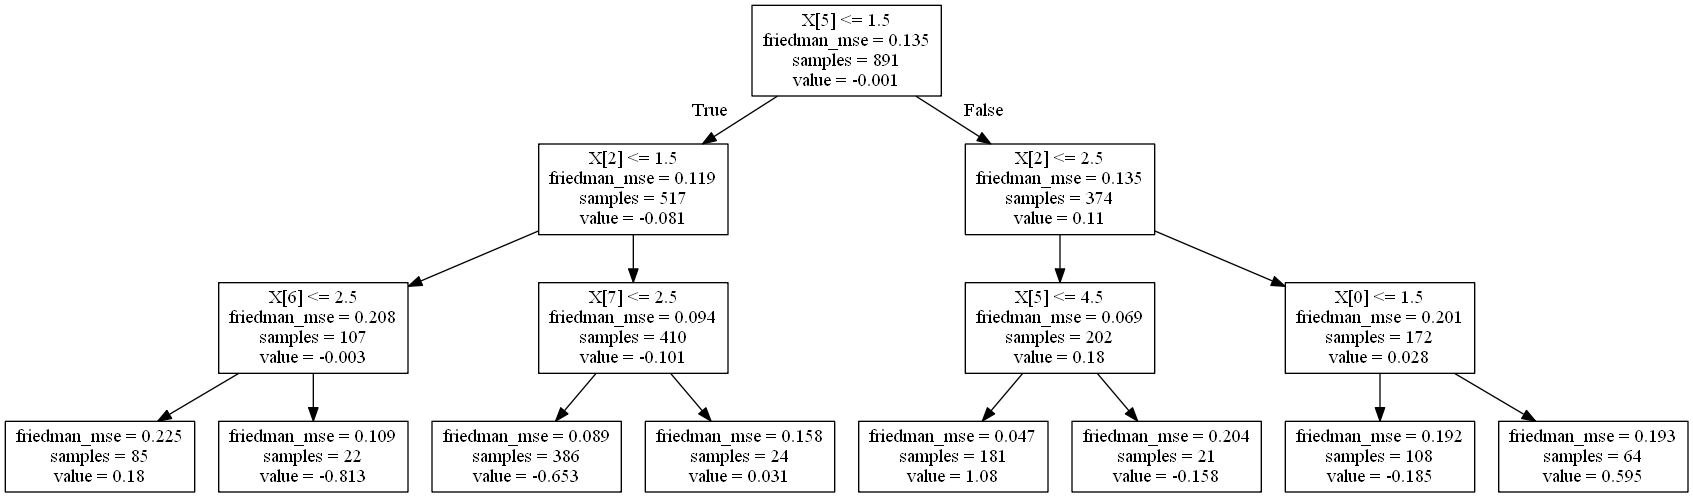

In [27]:
clf = GradientBoostingClassifier().fit(X,Y)

dot_data = export_graphviz(clf[10,0], out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# 6. Hyper-parameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV

In [29]:
# SVM
param_grid = {'C':[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'kernel':['rbf', 'linear']}

clf = svm.SVC()
svc_cv=GridSearchCV(clf, param_grid, cv=cv_split, n_jobs = 4) # verbose = True
svc_cv.fit(X,Y)
svc_acc = round((svc_cv.best_score_)*100,2)

print("Tuned SVC Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_acc))

Tuned SVC Parameters: {'kernel': 'rbf', 'C': 0.6, 'gamma': 0.1}
Best score is 82.28


In [30]:
# Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 10, 100, 1000],
             "solver": ['newton-cg','lbfgs','liblinear','sag','saga']}
clf = LogisticRegression()
log_cv=GridSearchCV(clf, param_grid, cv=cv_split, n_jobs = 4)
log_cv.fit(X,Y)
log_acc = round((log_cv.best_score_)*100,2)
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_))
print("Best score is {}".format(log_acc))

Tuned Logistic Regression Parameters: {'C': 0.2, 'solver': 'saga'}
Best score is 81.27


In [31]:
# Random Forest
param_grid = {'n_estimators': [50,100,150,300],
                'max_depth': [1,2,3,4,5,7],
                'min_samples_split': [2,3,5,10,15],
                'min_samples_leaf': [1,3,5]}
clf = RandomForestClassifier()
for_cv = GridSearchCV(clf, param_grid=param_grid, cv = cv_split, n_jobs = 4)
for_cv.fit(X,Y)
for_acc = round((for_cv.best_score_)*100,2)

print("Tuned Random Forest Parameters: {}".format(for_cv.best_params_))
print("Best score is {}".format(for_acc))

Tuned Random Forest Parameters: {'min_samples_split': 5, 'n_estimators': 300, 'max_depth': 7, 'min_samples_leaf': 3}
Best score is 83.73


In [32]:
# KNN 
param_grid = {"n_neighbors": np.arange(1, 20),
             "leaf_size": np.arange(5, 40),
             "algorithm": ["ball_tree","kd_tree","brute"]}

clf = KNeighborsClassifier()
knn_cv = GridSearchCV(clf, param_grid=param_grid, cv = cv_split, n_jobs = 4)
knn_cv.fit(X,Y)
knn_acc = round((knn_cv.best_score_)*100,2)

print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_acc))

Tuned KNN Parameters: {'leaf_size': 20, 'algorithm': 'ball_tree', 'n_neighbors': 5}
Best score is 82.05


In [33]:
# Decission Tree
param_grid = {"max_depth": np.arange(1, 10),
              "max_features": np.arange(1, 10),
              "min_samples_leaf": np.arange(1, 10),
              "criterion": ["gini","entropy"]}

clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf, param_grid=param_grid, cv = cv_split, n_jobs = 4, verbose = True)
tree_cv.fit(X,Y)
tree_acc = round((tree_cv.best_score_)*100,2)

print("Tuned Decission Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_acc))

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 2150 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 5650 tasks      | elapsed:   31.3s
[Parallel(n_jobs=4)]: Done 10550 tasks      | elapsed:   50.3s
[Parallel(n_jobs=4)]: Done 14580 out of 14580 | elapsed:  1.1min finished


Tuned Decission Tree Parameters: {'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 5, 'criterion': 'gini'}
Best score is 83.17


In [35]:
##########################################################
# Gradient Boosting
param_grid = {'max_depth':np.arange(1, 7),
              'min_samples_leaf': np.arange(1, 20),
              "max_features": np.arange(1, 6)}
             
grad_cv = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv = cv_split, n_jobs = 4, verbose = True)
grad_cv.fit(X,Y)
grad_acc = round((grad_cv.best_score_)*100,2)

print("Tuned Gradient Boosting Parameters: {}".format(grad_cv.best_params_))
print("Best score is {}".format(grad_acc))

Fitting 10 folds for each of 570 candidates, totalling 5700 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   59.8s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 5700 out of 5700 | elapsed:  7.4min finished


Tuned Gradient Boosting Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 5}
Best score is 83.54


In [36]:
# AdaBoostin - Decision Tree
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" : [10,20,30,40,50],
              "learning_rate":  [0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5]}

ada_tree_cv = GridSearchCV(estimator = AdaBoostClassifier(DecisionTreeClassifier()), param_grid=param_grid, cv = cv_split, n_jobs = 4, verbose = True)
ada_tree_cv.fit(X,Y)
ada_tree_acc = round((ada_tree_cv.best_score_)*100,2)

print("Tuned AdaBoost Parameters: {}".format(ada_tree_cv.best_params_))
print("Best score is {}".format(ada_tree_acc))

Fitting 10 folds for each of 520 candidates, totalling 5200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   39.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 5200 out of 5200 | elapsed:  6.3min finished


Tuned AdaBoost Parameters: {'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME.R', 'base_estimator__splitter': 'random', 'base_estimator__criterion': 'entropy'}
Best score is 83.06


In [37]:
## Bagged Decission Tree
param_grid = {'n_estimators':[100,200,300,400,500],
              'max_samples': [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg_tree_cv = GridSearchCV(clf, param_grid = param_grid, verbose = True, n_jobs = 4, cv = cv_split)
bg_tree_cv.fit(X,Y)
bg_tree_acc = round((bg_tree_cv.best_score_)*100,2)

print("Tuned Bagged Decission Tree Parameters: {}".format(bg_tree_cv.best_params_))
print("Best score is {}".format(bg_tree_acc))

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  5.2min finished


Tuned Bagged Decission Tree Parameters: {'max_samples': 0.4, 'n_estimators': 400}
Best score is 84.18


In [38]:
## Bagged KNN = 3
param_grid = {'n_estimators':[100,200,300,400,500],
              'max_samples': [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3))
knn3_cv = GridSearchCV(clf, param_grid = param_grid, verbose = True, n_jobs = 4, cv = cv_split)
knn3_cv.fit(X,Y)
knn3_acc = round((knn3_cv.best_score_)*100,2)

print("Tuned Bagged KNN Parameters: {}".format(knn3_cv.best_params_))
print("Best score is {}".format(knn3_acc))

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed: 15.4min finished


Tuned Bagged KNN Parameters: {'max_samples': 0.8, 'n_estimators': 200}
Best score is 82.54


In [39]:
# Extra Tree
param_grid = {"max_features": np.arange(1,10,1),
              "min_samples_split": [2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
              "n_estimators" :[1,2,3,4,5]}

ext_cv = GridSearchCV(ExtraTreesClassifier(),param_grid = param_grid, cv=cv_split, n_jobs= 4, verbose = True)
ext_cv.fit(X,Y)
ext_cv_acc = round((ext_cv.best_score_)*100,2)

print("Tuned Extra Trees Parameters: {}".format(ext_cv.best_params_))
print("Best score is {}".format(ext_cv_acc))

Fitting 10 folds for each of 4050 candidates, totalling 40500 fits


[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 644 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 1644 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done 3044 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done 4844 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 7044 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 9644 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 12644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 16044 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 19844 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 24044 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 28644 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 33644 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 39044 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 40500 out of 40500 | elapsed:  7.8min finished


Tuned Extra Trees Parameters: {'min_samples_split': 6, 'n_estimators': 5, 'min_samples_leaf': 3, 'max_features': 9}
Best score is 83.66


In [11]:
# XGBClassifier
param_grid = {'learning_rate': [.01, .03, .05, .1, .25],
             'max_depth': [1,2,4,6,8,10],
             'n_estimators': [10, 50, 100, 200, 300],
             'gamma':[1,2,3],
             'subsample':[1,0.8,0.7,0.5,0.3,0.2],
             #'base_score':[0.5],
              'booster':['gbtree','gblinear','dart']}
xg_cv = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv = cv_split, n_jobs = 4, verbose = True)
xg_cv.fit(X,Y)
xg_acc = round((xg_cv.best_score_)*100,2)

print("Tuned XGBClassifier Parameters: {}".format(xg_cv.best_params_))
print("Best score is {}".format(xg_acc))

# 84.18 - УБРАТЬ BASE SCORE  subsample

Fitting 10 folds for each of 8100 candidates, totalling 81000 fits


[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 724 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done 1218 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1714 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 2687 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 4169 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 5899 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 8069 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 10349 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 12983 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 15872 tasks      | elapsed: 14.1min
[Parallel(n_jobs=4)]: Done 19196 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 22762 tasks      | elapsed: 19.6min
[Parallel(n_jobs=4)]: Done 26437 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 36284 tasks      | elapsed: 25.9min
[Parallel(n_jobs=4)]: Done 48684 tasks      | elapsed: 29.4min
[P

Tuned XGBClassifier Parameters: {'gamma': 1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8, 'booster': 'gbtree', 'learning_rate': 0.03}
Best score is 84.18


In [ ]:
#LGBMClassifier
param_grid = {'learning_rate': [.01, .03, .05, .1, .25],
             'max_depth': [1,2,4,6,8,10],
             'n_estimators': [10, 50, 100, 200, 300],
             'gamma':[1,2,3],
             'subsample':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2],
             'booster':['gbtree','gblinear','dart']}
            
lgb_cv = GridSearchCV(LGBMClassifier(), param_grid=param_grid, cv = cv_split, n_jobs = 4, verbose = True)
lgb_cv.fit(X,Y)
lgb_acc = round((lgb_cv.best_score_)*100,2)

print("Tuned LGBMClassifier Parameters: {}".format(lgb_cv.best_params_))
print("Best score is {}".format(lgb_acc))

In [ ]:
# Check The result

In [44]:
model = pd.DataFrame({'Model':['SVM', 'Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting', 
                              'AdaBoosting', 'Bagged Decision Tree', 'Bagged KNN', 'ExtraTreesClassifier', 'XGBClassifier',
                              'LGBMClassifier'],
                     'Accuracy':[svc_acc, log_acc, for_acc, knn_acc, tree_acc, grad_acc, ada_tree_acc, bg_tree_acc, knn3_acc,
                                ext_cv_acc, xg_acc, lgb_acc]}, columns = ['Model','Accuracy']).sort_values(by = 'Accuracy', ascending = False)
model

Model  Accuracy
7   Bagged Decision Tree     84.18
10         XGBClassifier     84.18
2          Random Forest     83.73
9   ExtraTreesClassifier     83.66
5      Gradient Boosting     83.54
11        LGBMClassifier     83.43
4          Decision Tree     83.17
6            AdaBoosting     83.06
8             Bagged KNN     82.54
0                    SVM     82.28
3                    KNN     82.05
1    Logistic Regression     81.27

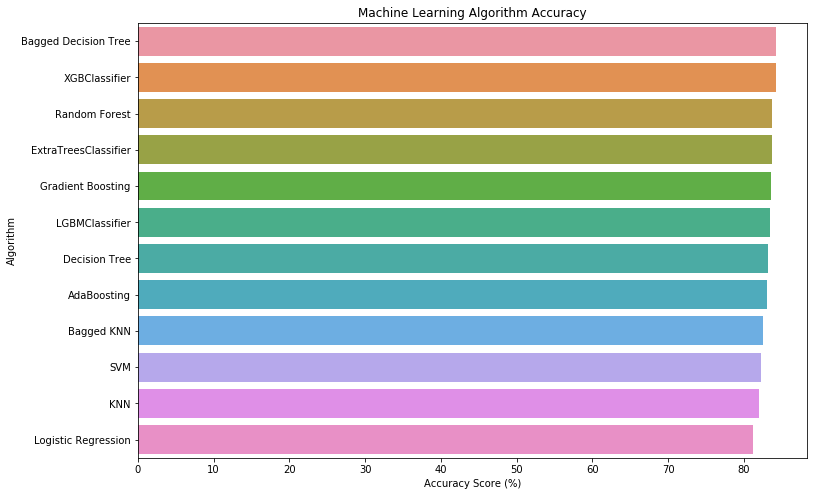

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x= 'Accuracy', y= 'Model', data = model)
ax.set (title = 'Machine Learning Algorithm Accuracy', ylabel = 'Algorithm', xlabel = 'Accuracy Score (%)')

# Hyper-parameter Tunning (use only in necessary)

In [ ]:
MLA = [svm.SVC(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(), 
      GradientBoostingClassifier(), AdaBoostClassifier(DecisionTreeClassifier()), BaggingClassifier(base_estimator=DecisionTreeClassifier()),
      BaggingClassifier(base_estimator=KNeighborsClassifier()), ExtraTreesClassifier()]

C = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
min_samples_leaf = np.arange(1, 20)
max_depth = np.arange(1, 10)
max_features = np.arange(1, 10)
n_estimators = [100,200,300,400,500]
max_samples = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

grid_param = [
            #SVM
            [{'C':C,
              'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'kernel':['rbf', 'linear']}],
            #Logistic Regression
            [{'C': C,
             "solver": ['newton-cg','lbfgs','liblinear','sag','saga']}],
            #Random Forest
            [{'n_estimators': range(100,500,100),
             'max_depth': max_depth,
             'min_samples_split': [5,10,15],
             'min_samples_leaf': min_samples_leaf}],
            #KNN
            [{"n_neighbors": np.arange(1, 20),
             "leaf_size": np.arange(20, 40),
             "algorithm": ["ball_tree","kd_tree","brute"]}],
            #Decision Tree
            [{"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_leaf": min_samples_leaf,
              "criterion": ["gini","entropy"]}],
            #Gradient Boosting
            [{'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              "max_features": max_features}],
            #AdaBoosting 
            [{"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" : [10,20,30,40,50],
              "learning_rate":  [0.001, 0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.5]}],
            #Bagged Decission Tree - 
            [{'n_estimators': n_estimators,
              'max_samples': max_samples},
            #Bagged KNN - 
            [{'n_estimators': n_estimators,
              'max_samples': max_samples}],
             #Extra Trees 
            [{"max_features": max_features,
              "min_samples_split": [2,3,4,5,6,7,8,9,10],
              "min_samples_leaf": min_samples_leaf,
              "n_estimators" :[1,2,3,4,5]}]
]

In [ ]:
import time
start_total = time.perf_counter()

for alg, param in zip(MLA, grid_param):
    start = time.perf_counter()
    best_search = GridSearchCV(estimator = alg, param_grid=param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X,Y)
    
    run = time.perf_counter() - start
    best_param = best_search.best_params_
    
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(alg.__class__.__name__, best_param, run), '\n')
    alg.set_params(**best_param)

run_total = time.perf_counter()-start_total
print('Total optimization time was {:.2f} minutes'.format(run_total/60))


# 7. Voting Classifier

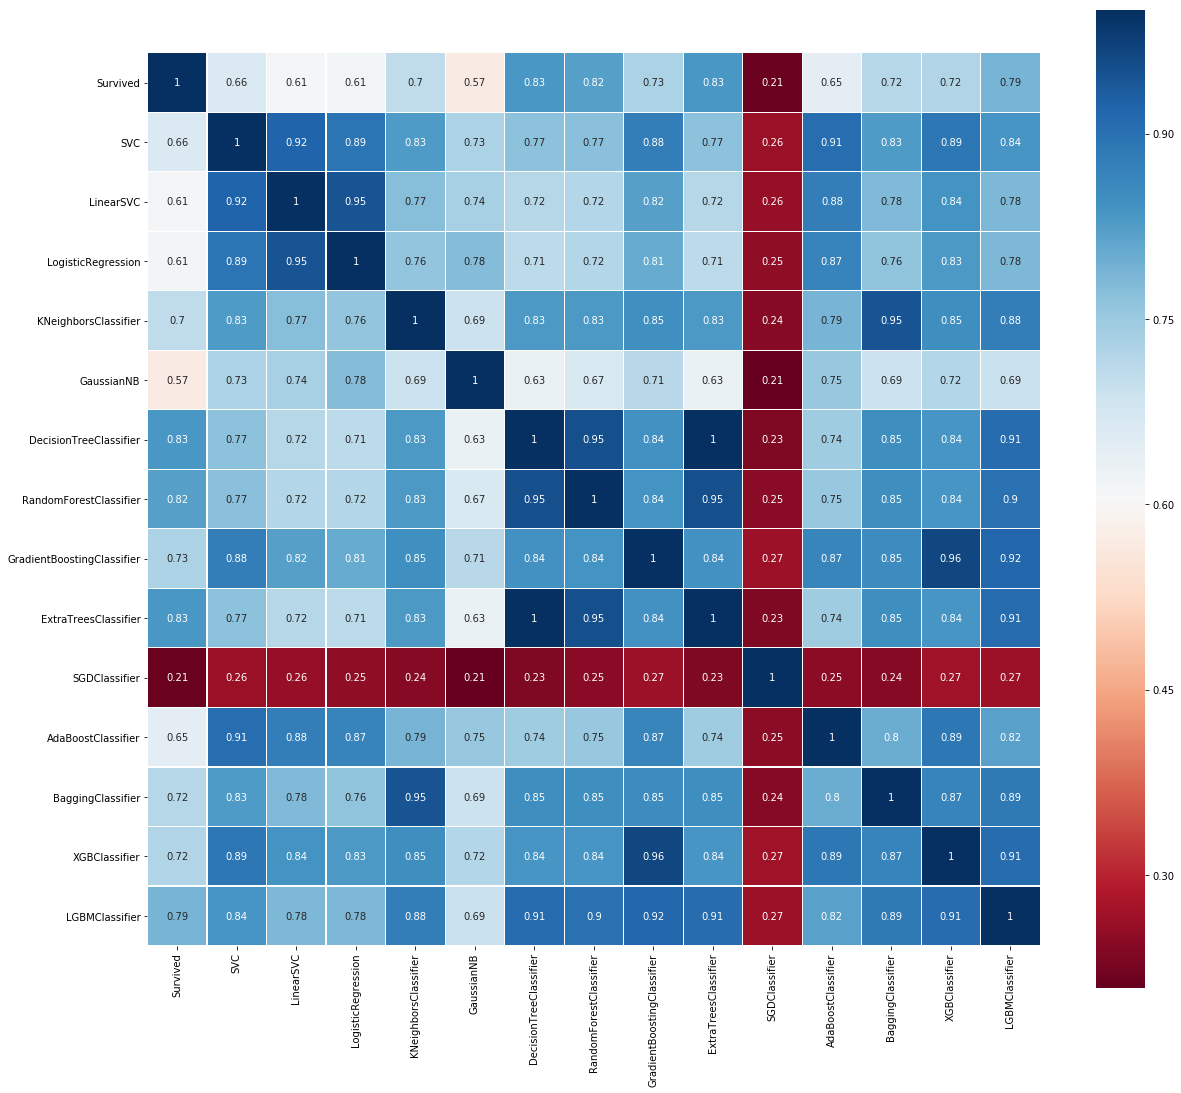

In [46]:
plt.figure(figsize = (20,18))
sns.heatmap(model_predict.corr(), linewidths = 0.1, vmax = 1.0, square = True, annot = True, cmap = plt.cm.RdBu)

In [51]:
vot_class = [('Ada', AdaBoostClassifier()),
            ('Bagg Tree', BaggingClassifier(DecisionTreeClassifier())),
            ('Ext_Tree', ExtraTreesClassifier()),
            ('Grad_Boost', GradientBoostingClassifier()),
            #('Forest', RandomForestClassifier()),
            ('Log_Reg', LogisticRegression()),
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('SVC', svm.SVC(probability=True))]

In [50]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

vote_hard = VotingClassifier(estimators = vot_class, voting = 'hard')
vote_hard_cv = cross_validate(vote_hard,X,Y, cv = cv_split)
vote_hard.fit(X,Y)
hard_test = vote_hard_cv['test_score'].mean()
print('Hard Voting Training Mean Score is ', round(vote_hard_cv['train_score'].mean()*100,2))
print('Hard Voting Test Mean Score is ', round(vote_hard_cv['test_score'].mean()*100,2))
print('\n')

vote_soft = VotingClassifier(estimators = vot_class, voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, X,Y, cv = cv_split)
vote_soft.fit(X,Y)
soft_test = vote_soft_cv['test_score'].mean()
print('Soft Voting Training Mean Score is ', round(vote_soft_cv['train_score'].mean()*100,2))
print('Soft Voting Test Mean Score is ', round(vote_soft_cv['test_score'].mean()*100,2))

Hard Voting Training Mean Score is  88.11
Hard Voting Test Mean Score is  83.88


Soft Voting Training Mean Score is  90.64
Soft Voting Test Mean Score is  83.99


# 8. Recursive feature elimination (RFE) with cross validation

In [114]:
from sklearn import feature_selection

# base model 
dtree = DecisionTreeClassifier(random_state = 0)
base_result = cross_validate(dtree, X,Y, cv = cv_split)
dtree.fit(X,Y)
print('--------Base model Decision Tree--------')
print('Columns: ', X.columns.values)
print('Training mean score is ', round(base_result['train_score'].mean()*100,2))
print('Test score mean is ', round(base_result['test_score'].mean()*100,2), '\n\n')


# RFE model
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X,Y)
X_rfe = X.columns.values[dtree_rfe.get_support()]
rfe_results = cross_validate(dtree, X[X_rfe], Y, cv = cv_split)
print('--------Model: Decision Tree RFE--------')
print('Columns: ', X_rfe)
print('Training mean score is ', round(rfe_results['train_score'].mean()*100,2))
print('Test score mean is ', round(rfe_results['test_score'].mean()*100,2), '\n\n')


# tune RFE model
rfe_tune_model = GridSearchCV(DecisionTreeClassifier(), param_grid = {'criterion':['gini','entropy'],
                                                                                         'max_depth':[2,4,6,8,10,None],
                                                                                         'random_state':[0]}
                                              , scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(X,Y)
print('--------Model: Decision Tree RFE Tuned Parameters--------')
print('Best parameters: ', rfe_tune_model.best_params_)
print('Training mean score is ', round(rfe_tune_model.cv_results_['mean_train_score'].mean()*100,2))
print('Test score mean is ', round(rfe_tune_model.cv_results_['mean_test_score'].mean()*100,2))

--------Base model Decision Tree--------
Columns:  ['Embarked' 'Parch' 'Pclass' 'Sex' 'SibSp' 'Title' 'AgeGroups'
 'FareCategory' 'DeckCode' 'RoomCategory' 'FamilySize' 'Alone']
Training mean score is  92.63
Test score mean is  81.12 


--------Model: Decision Tree RFE--------
Columns:  ['Pclass' 'Title' 'AgeGroups' 'FareCategory' 'RoomCategory' 'FamilySize']
Training mean score is  90.32
Test score mean is  82.43 


--------Model: Decision Tree RFE Tuned Parameters--------
Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
Training mean score is  92.6
Test score mean is  82.65


# 9. FEATURE IMPORTANCE


In [61]:
grad_cv.best_estimator_.feature_importances_

array([ 0.05892985,  0.04046567,  0.07931207,  0.06795462,  0.07764577,
        0.13725727,  0.12357211,  0.10272396,  0.09908827,  0.10596963,
        0.09408431,  0.01299647])

In [71]:
feature_df = pd.DataFrame({' feature':X.columns, 
                          'XGBClassifier': xg_cv.best_estimator_.feature_importances_,
                          'Random Forest': for_cv.best_estimator_.feature_importances_,
                          'ExtraTreesClassifier': ext_cv.best_estimator_.feature_importances_,
                          'GradientBoostingClassifier': grad_cv.best_estimator_.feature_importances_})
feature_df

feature  ExtraTreesClassifier  GradientBoostingClassifier  \
0       Embarked              0.029316                    0.058930   
1          Parch              0.008532                    0.040466   
2         Pclass              0.099596                    0.079312   
3            Sex              0.395766                    0.067955   
4          SibSp              0.043676                    0.077646   
5          Title              0.146884                    0.137257   
6      AgeGroups              0.039210                    0.123572   
7   FareCategory              0.058409                    0.102724   
8       DeckCode              0.035478                    0.099088   
9   RoomCategory              0.058711                    0.105970   
10    FamilySize              0.072989                    0.094084   
11         Alone              0.011434                    0.012996   

    Random Forest  XGBClassifier  
0        0.024663       0.079283  
1        0.018829       0.026887  
2        0.098230       0.096863  
3        0.244787       0.029990  
4        0.039480       0.075491  
5        0.277125       0.095829  
6        0.047851       0.143399  
7        0.057774       0.155119  
8        0.061181       0.095829  
9        0.056417       0.096863  
10       0.062639       0.104447  
11       0.011023       0.000000

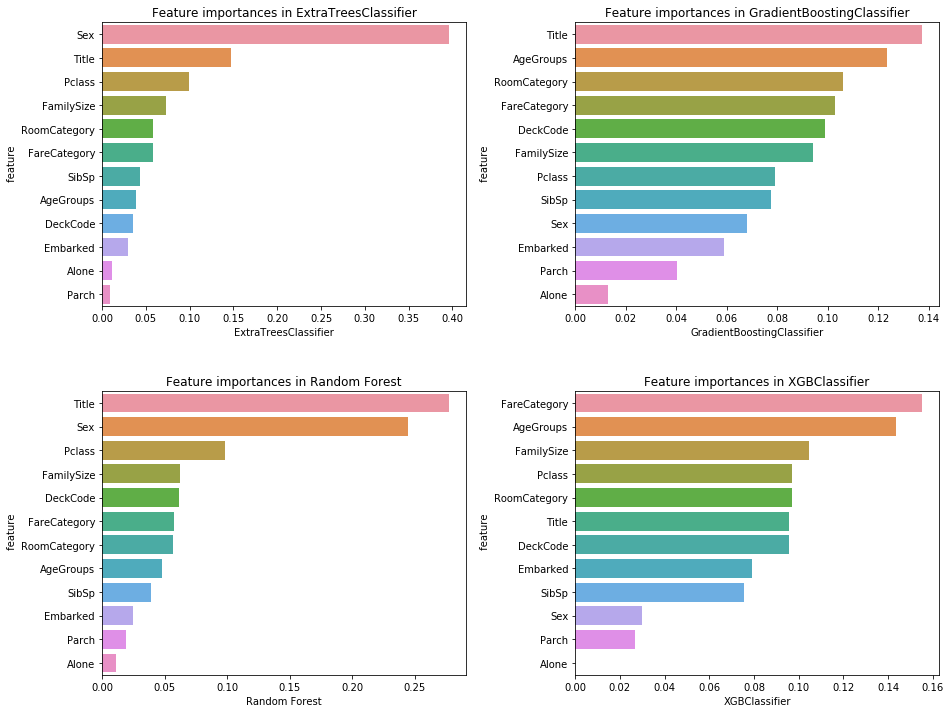

In [112]:
f, ax = plt.subplots(2,2,figsize = (15,12))
index = 1
for i in range(0,2):
    for j in range(0,2):
        name  = feature_df.columns[index]
        sns.barplot(x= name, y= ' feature', data = feature_df.sort_values(by = name, ascending=False), ax = ax[i,j])
        ax[i,j].set_title('Feature importances in '+name)
        f.subplots_adjust(hspace=0.3, wspace = 0.3)
        index +=1
        j+=1
    i+=1

# 10. Prediction

In [130]:
pred_columns = ['BaggingClassifier (DecisionTree)', 'XGBClassifier', 'VotingClassifier (Soft)', \
                'VotingClassifier (Hard)', 'Random Forest']
pred_df = pd.DataFrame(columns=pred_columns)

In [131]:
test = test_df.drop('Survived', axis = 1)

pred_df['BaggingClassifier (DecisionTree)'] = bg_tree_cv.best_estimator_.predict(test)
pred_df['XGBClassifier'] = xg_cv.best_estimator_.predict(test)
pred_df['VotingClassifier (Soft)'] = vote_soft.predict(test)
pred_df['VotingClassifier (Hard)'] = vote_hard.predict(test)
pred_df['Random Forest'] = for_cv.best_estimator_.predict(test)
pred_df

BaggingClassifier (DecisionTree)  XGBClassifier  VotingClassifier (Soft)  \
0                                 0.0            0.0                      0.0   
1                                 0.0            0.0                      0.0   
2                                 0.0            0.0                      0.0   
3                                 0.0            0.0                      0.0   
4                                 0.0            0.0                      0.0   
5                                 0.0            0.0                      0.0   
6                                 1.0            1.0                      1.0   
7                                 0.0            0.0                      0.0   
8                                 1.0            1.0                      1.0   
9                                 0.0            0.0                      0.0   
10                                0.0            0.0                      0.0   
11                                1.0            0.0                      0.0   
12                                1.0            1.0                      1.0   
13                                0.0            0.0                      0.0   
14                                1.0            1.0                      1.0   
15                                1.0            1.0                      1.0   
16                                0.0            0.0                      0.0   
17                                0.0            0.0                      0.0   
18                                1.0            0.0                      0.0   
19                                1.0            1.0                      1.0   
20                                0.0            0.0                      0.0   
21                                1.0            1.0                      1.0   
22                                1.0            1.0                      1.0   
23                                0.0            0.0                      0.0   
24                                1.0            1.0                      1.0   
25                                0.0            0.0                      0.0   
26                                1.0            1.0                      1.0   
27                                0.0            0.0                      0.0   
28                                1.0            1.0                      0.0   
29                                0.0            0.0                      0.0   
..                                ...            ...                      ...   
388                               0.0            0.0                      0.0   
389                               0.0            0.0                      0.0   
390                               0.0            0.0                      1.0   
391                               1.0            1.0                      1.0   
392                               1.0            1.0                      1.0   
393                               0.0            0.0                      0.0   
394                               0.0            0.0                      0.0   
395                               1.0            1.0                      1.0   
396                               0.0            0.0                      0.0   
397                               1.0            1.0                      1.0   
398                               0.0            0.0                      0.0   
399                               0.0            0.0                      0.0   
400                               1.0            1.0                      1.0   
401                               0.0            0.0                      0.0   
402                               1.0            1.0                      1.0   
403                               0.0            0.0                      0.0   
404                               1.0            1.0                      1.0   
405                               1.